In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


# In this project, I had finished some EDA process,and Utilized four predictive models( logistic regression, Support vector machine, random forest and neural network) and evaluate.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [3]:
churn=pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
churn.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# change totalcharges's type(object) to float64

In [7]:
churn['TotalCharges']=pd.to_numeric(churn['TotalCharges'],errors = 'coerce')

In [8]:
churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
churn.dropna(inplace=True)

In [10]:
# delete the first column (customerID)
churn.head()
churn_d=churn.iloc[:,1:]

In [11]:
# transfrom yes,no to 1,0
churn_d['Churn'].replace(to_replace='Yes',value=1,inplace=True) 
churn_d['Churn'].replace(to_replace='No',value=0,inplace=True)

In [12]:
#get_dummy 
churn_dum= pd.get_dummies(churn_d)
churn_dum.columns.values

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'gender_Female', 'gender_Male', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contr

# Distribution of our target value : churn 

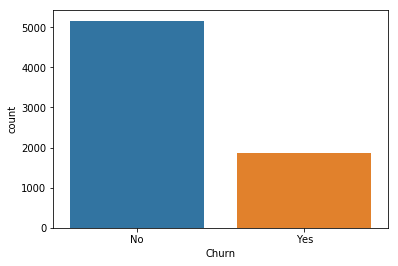

In [13]:
sns.countplot(x="Churn",data=churn)

From the result, the dataset is imbalance, which would make our accuracy measurement untenable, when 
we evaluate the model, we prefer to use recall or f1 to judge.

# Correlation Analysis

Text(0, 0.5, 'correlation')

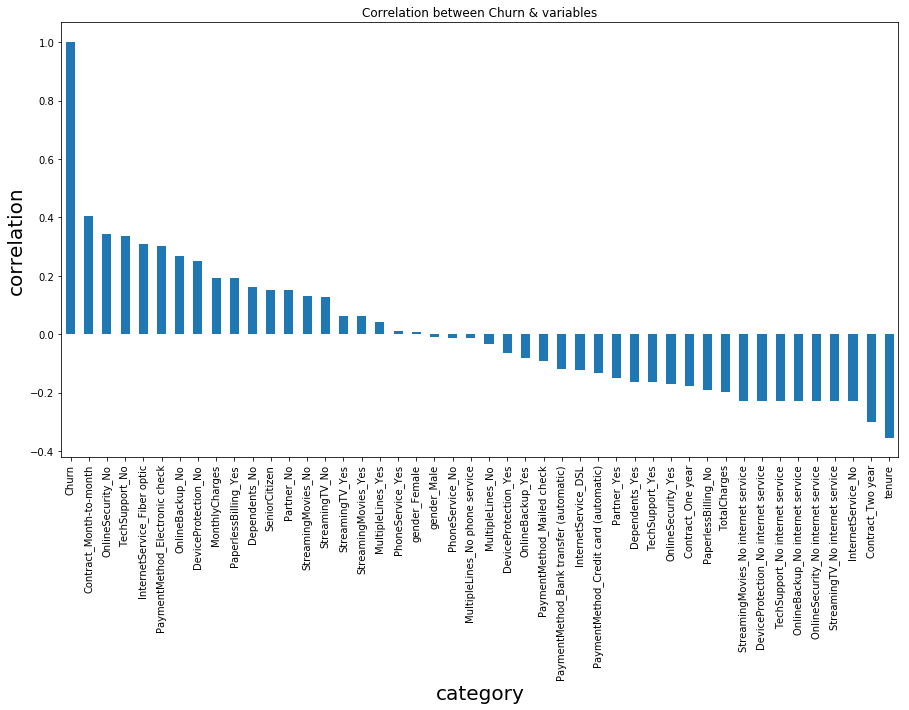

In [14]:
plt.figure(figsize=(15,8)) 
churn_corr = churn_dum.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', 
                                                                         title ='Correlation between Churn & variables'
                                                                        )
churn_corr.set_xlabel('category',fontsize=20) 
churn_corr.set_ylabel('correlation',fontsize=20)

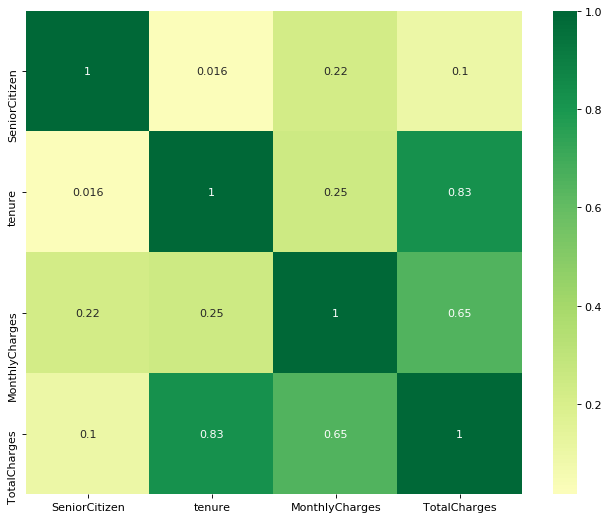

In [15]:
plt.figure(figsize=(10,8), dpi= 80) 
sns.heatmap(churn.corr(), xticklabels=churn.corr().columns, 
            yticklabels=churn.corr().columns, cmap='RdYlGn', center=0, annot=True)

Top 3 positive correlated variables : contract month_to_month, online_security_No, tech_support_No, 
Top 3 negative correlated variables:  tenure, contract_2_year, internet_servive_no, streaming_service_NO 

Some interetsing things:

1.contract_month_to_month and contract_2year have totally diﬀerent inﬂuences.

2.monthly charge and total_charge have opposite eﬀects on churn

3.total_charge and tenure has strong relationship (0.83)

4.absence of online security and tech support seem to be positively correlated with churn

5.customer with no internet service are less likely to churn. 

6.difference among payment methods.

...

In [16]:
# more exploration 

 # Churn & Contract

In [17]:
for item in churn['Contract'].unique():
    print(item)

Month-to-month
One year
Two year


In [18]:
contract_types = (churn['Contract'].value_counts(normalize=True) * 100).keys().tolist() 
contract_propotion = (churn['Contract'].value_counts(normalize=True) * 100).values.tolist()
for i in range(3):
    contract_propotion[i]=round(contract_propotion[i],2)
text= ['{} %'.format(x) for x in contract_propotion]
print(contract_types)

['Month-to-month', 'Two year', 'One year']


the result shows that majority of cutsomers have month_month contract(55.11%)
Then visualize the churn rate for different groups.

In [19]:
month_to_month =churn.loc[churn['Contract']=='Month-to-month'] 
m2m = int(round((month_to_month['Churn'].value_counts(normalize=True) * 100)['Yes']))
one_year =churn.loc[churn['Contract']=='One year'] 
oney = int(round((one_year['Churn'].value_counts(normalize=True) * 100)['Yes']))
two_year =churn.loc[churn['Contract']=='Two year'] 
twoy = int(round((two_year['Churn'].value_counts(normalize=True) * 100)['Yes']))
churn_rate = [m2m, oney, twoy] 
retention_rate = [100 - m2m, 100 - oney, 100 - twoy]
print(contract_types,'\n',contract_propotion,'\n',churn_rate,'\n',retention_rate)

['Month-to-month', 'Two year', 'One year'] 
 [55.11, 23.96, 20.93] 
 [43, 11, 3] 
 [57, 89, 97]


Text(0.5, 0, 'contract type')

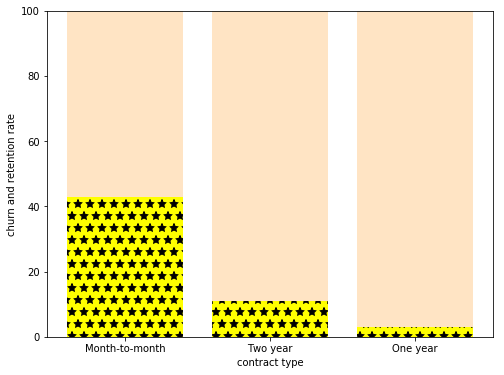

In [20]:
#Visulize the result above 

plt.figure(figsize=(8,6)) 
churn_label=['{} %'.format(x) for x in churn_rate] 
retention_label=['{} %'.format(x) for x in retention_rate]
p1=plt.bar(contract_types,churn_rate,color='yellow', hatch="*") 
p2=plt.bar(contract_types, retention_rate,bottom=churn_rate,color='#FFE4C4')
plt.ylim(0,100) 
plt.ylabel('churn and retention rate') 
plt.xlabel('contract type')

the area of yellow with star represents churn rate. According to the bar chart, people with month to month contract are much easier to churn.
M2M > 2 year > 1 year

# Churn & Charge & Contract

install plotly from terminal

****pip install plotly

https://plot.ly/python/plotly-express/

In [21]:
import plotly.express as px 
fig = px.histogram(churn, x="Churn", y="MonthlyCharges", color='Churn', facet_col="Contract", histfunc='avg')
fig.update_layout(title_text='Average Monthly Cost by Contract Type')
fig.show()

nomatter which type of contract customer chooses, increasing average monthly charges, much easier to churn, 

# Churn & Tenure & Contract

In [22]:
#Tenure: Number of months the customer has stayed with the company
churn["tenure"].describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

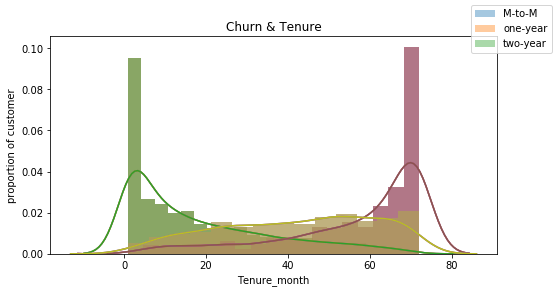

In [23]:
fig, a1=plt.subplots(nrows=1,ncols=1,sharey=True,figsize=(8,4))
for type in contract_types:
    for ai in [a1]:
        for title in ['M-to-M','One-year','Two-year']:
            a=sns.distplot(churn[churn['Contract']==type]['tenure'],ax=ai)
            a.set_xlabel('Tenure_month')
            a.set_ylabel('proportion of customer') 
            a.set_title('Churn & Tenure')
fig.legend(labels=['M-to-M','one-year','two-year'])

for people who only has a monthly contract tend to has a shorter tenure and longer in a two year contract,

longer time, more loyal, 

so we might need to adjust some strategies for the short contract with conditions and terms.

# Churn & Service 

In [24]:
# build a list of service including all...

service=['PhoneService','MultipleLines','InternetService','OnlineSecurity', 
         'OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies']

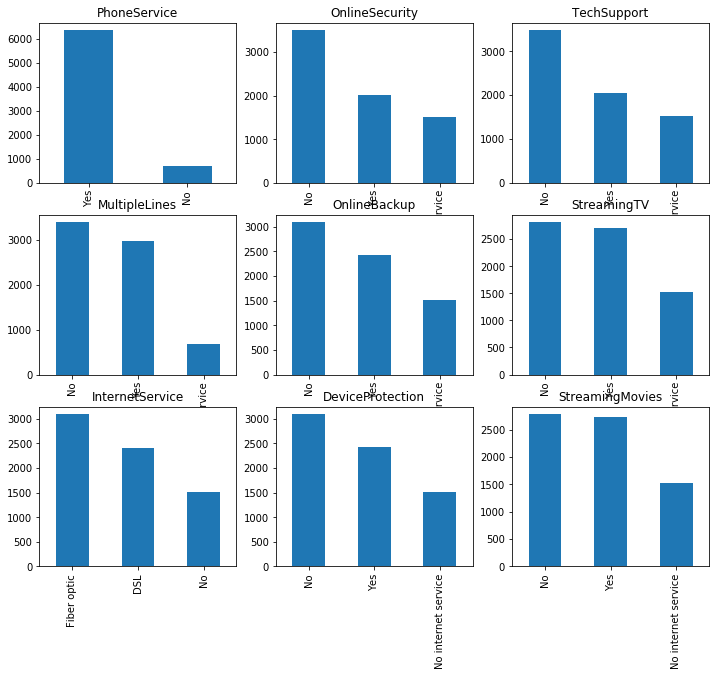

In [25]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(12,10)) 

for i,item in enumerate(service):
    if i <3:
        ax=churn[item].value_counts().plot(kind='bar',ax=axes[i,0]) 
    if i >= 3 and i < 6:
        ax=churn[item].value_counts().plot(kind='bar',ax=axes[i-3,1]) 
    if i>=6:
        ax=churn[item].value_counts().plot(kind='bar',ax=axes[i-6,2]) 
    ax.set_title(item)

from all the figures above (except phone service)
absence of online security and tech support ... and etc. seem to be abviously positively correlated with churn. 
that when this service == 'Yes', they are less likely to churn 

data visualization results are accord with the result (1,2,3,4) of correlation analysis, 
After EDA, I would build some classification model and evaluate.

(Logistic model, random forest, support vector machine, neural netwrok)

# logistic model 

In [26]:
churn_dum.head() # get_dummy before

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [27]:
# choose variables 
x=churn_dum.drop(columns=['Churn']) 
y=churn_dum['Churn'] 
#normalization 
from sklearn.preprocessing import MinMaxScaler 
features=x.columns.values 
scaler=MinMaxScaler(feature_range=(0,1)) 
scaler.fit(x) 
x=pd.DataFrame(scaler.transform(x)) 
x.columns=features

In [28]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=101)

In [29]:
from sklearn.linear_model import LogisticRegression 
model=LogisticRegression() 
result=model.fit(x_train,y_train)

from sklearn import metrics
lg_pred=model.predict(x_test)
print(metrics.accuracy_score(y_test,lg_pred))

0.8075829383886256


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [30]:
from sklearn.metrics import classification_report 
lg_report= classification_report(y_test, lg_pred) 
print(lg_report)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1580
           1       0.64      0.54      0.58       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



# Random Forest 

In [31]:
from sklearn.ensemble import RandomForestClassifier 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=101) 
model_r=RandomForestClassifier(n_estimators=100,random_state=50, oob_score=True) 
model_r.fit(x_train,y_train) 
rf_pred=model_r.predict(x_test)
print(metrics.accuracy_score(y_test,rf_pred))

0.795734597156398


In [32]:
rf_report=classification_report(y_test, rf_pred)
print(rf_report)

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1580
           1       0.61      0.50      0.55       530

    accuracy                           0.80      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.79      0.80      0.79      2110



# I would explore and find the most appropiate tree numbers (n_estomators)

In [33]:
rand_score =[] 
for i in range(1,102):
    i_loop= RandomForestClassifier(n_estimators=i, random_state=101) 
    i_loop.fit(x_train,y_train) 
    loop_pre=i_loop.predict(x_test) 
    rand_score.append(metrics.accuracy_score(y_test,loop_pre))

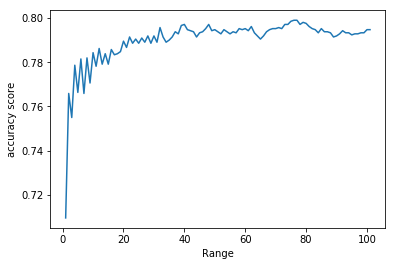

In [34]:
plt.plot(range(1,102),rand_score)
plt.xlabel("Range") 
plt.ylabel("accuracy score")
plt.show()

# 79 trees around

In [35]:
model_r=RandomForestClassifier(n_estimators=79,random_state=101, oob_score=True)
model_r.fit(x_train,y_train) 
rf_new_pred=model_r.predict(x_test)
print(metrics.accuracy_score(y_test,rf_new_pred))

0.7981042654028436


In [36]:
# only a little bit improvement 

In [37]:
rf_new_report=classification_report(y_test, rf_new_pred)
print(rf_new_report)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1580
           1       0.62      0.50      0.55       530

    accuracy                           0.80      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.79      0.80      0.79      2110



In [38]:
rand_coef=model_r.feature_importances_ 
weight=pd.Series(rand_coef,index=x.columns.values)
weight.sort_values(ascending=False)[:10]

TotalCharges                      0.158485
tenure                            0.146398
MonthlyCharges                    0.136710
Contract_Month-to-month           0.047121
PaymentMethod_Electronic check    0.030749
TechSupport_No                    0.029945
OnlineSecurity_No                 0.028683
InternetService_Fiber optic       0.022903
SeniorCitizen                     0.020710
gender_Female                     0.018292
dtype: float64

same: TOTAL charges, tenure and monthlycharges, contract .. are highly possive related with churn result 

seems no change for recall and f1 LOL

# SVM

In [39]:
from sklearn.svm import SVC
svc_model = SVC(random_state=101)
svc_model.fit(x_train, y_train) 
accuracy_svc = svc_model.score(x_test, y_test)
print(accuracy_svc)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



0.8085308056872038


In [40]:
svm_pred=svc_model.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
svm_report=classification_report(y_test,svm_pred) 
print(svm_report)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1580
           1       0.65      0.51      0.57       530

    accuracy                           0.81      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.80      0.81      0.80      2110



# Neural Network

In [41]:
x_train.head() # has been standardalized

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2785,0.0,0.690141,0.909453,0.638397,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
896,0.0,0.154930,0.802488,0.127181,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3958,1.0,0.718310,0.878109,0.646556,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5193,0.0,0.112676,0.016418,0.016824,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1270,0.0,0.859155,0.824876,0.763853,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [42]:
import keras

Using TensorFlow backend.


In [43]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras import optimizers 
model_nn = Sequential() 
sgd= optimizers.SGD(lr=0.01) # (set learning rate)
# first time, no gradient descend, so might be the reason learning rate is too fast, thus...set it as 0.01

In [44]:
model_nn.add(Dense(45, activation= 'relu', input_dim=45)) 
model_nn.add(Dense(22, activation='relu'))
model_nn.add(Dense(11, activation='relu')) 
model_nn.add(Dense(6, activation='relu')) 
model_nn.add(Dense(1,activation='sigmoid'))

In [45]:
model_nn.compile(loss='binary_crossentropy',optimizer='SGD',metrics=['accuracy']) 
history= model_nn.fit(x_train, y_train,
                      batch_size=30, epochs=50, validation_data=(x_test,y_test))

Train on 4922 samples, validate on 2110 samples
Epoch 1/50
4922/4922 [==============================] - 1s 152us/step - loss: 0.6543 - accuracy: 0.6524 - val_loss: 0.5964 - val_accuracy: 0.7488
Epoch 2/50
4922/4922 [==============================] - 0s 71us/step - loss: 0.5849 - accuracy: 0.7280 - val_loss: 0.5515 - val_accuracy: 0.7488
Epoch 3/50
4922/4922 [==============================] - 0s 72us/step - loss: 0.5538 - accuracy: 0.7280 - val_loss: 0.5200 - val_accuracy: 0.7488
Epoch 4/50
4922/4922 [==============================] - 0s 74us/step - loss: 0.5163 - accuracy: 0.7280 - val_loss: 0.4833 - val_accuracy: 0.7483
Epoch 5/50
4922/4922 [==============================] - 0s 72us/step - loss: 0.4789 - accuracy: 0.7397 - val_loss: 0.4594 - val_accuracy: 0.7768
Epoch 6/50
4922/4922 [==============================] - 0s 74us/step - loss: 0.4570 - accuracy: 0.7688 - val_loss: 0.4479 - val_accuracy: 0.7929
Epoch 7/50
4922/4922 [==============================] - 0s 74us/step - loss: 0.44

In [46]:
result_1=model_nn.evaluate(x_test,y_test)
result_1

2110/2110 [==============================] - 0s 26us/step


[0.4195965910974837, 0.8080568909645081]

In [47]:
history_dict=history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [48]:
loss_value=history_dict['loss'] 
val_loss_values= history_dict['val_loss']

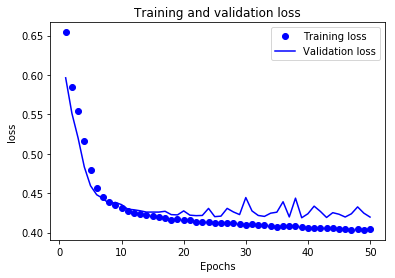

In [49]:
plt.clf() 
epochs=range(1,len(loss_value)+1)
plt.plot(epochs,loss_value,'bo',label='Training loss') 
plt.plot(epochs,val_loss_values,'b',label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('loss')
plt.legend()

In [50]:
 # Accroding to the graph, it is reasonable to use epochs=50 where has the least loss 

In [51]:
nn_pred = model_nn.predict(x_test)
nn_pred[1:5]

array([[0.1289881 ],
       [0.3335585 ],
       [0.7528705 ],
       [0.07622311]], dtype=float32)

In [52]:
def threshold(nn_pred):
    lst_threshold=[] 
    for i in nn_pred:
        if i >=0.5:
            i=1 
            lst_threshold.append(i)
        else: 
            i=0 
            lst_threshold.append(i)
    return lst_threshold


for report precision, recall and f1,
Classification metrics can't handle a mix of binary and continuous targets !!!!

build threshold rule for neural network

In [53]:
nn_pred_new = threshold(nn_pred) 
nn_pred_new[1:5]

[0, 0, 1, 0]

In [54]:
nn_report=classification_report(y_test,nn_pred_new)
print(nn_report)

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1580
           1       0.64      0.54      0.58       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



In [55]:
print('\n--------------------Logistic Regression-----------------\n',lg_report, 
      '\n----------------------Random Forest---------------------\n',rf_report, 
      '\n----------------- Support Vector Machine----------------\n',svm_report, 
      '\n---------------------Neural Network---------------------\n',nn_report)


--------------------Logistic Regression-----------------
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1580
           1       0.64      0.54      0.58       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110
 
----------------------Random Forest---------------------
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1580
           1       0.61      0.50      0.55       530

    accuracy                           0.80      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.79      0.80      0.79      2110
 
----------------- Support Vector Machine----------------
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1580
           1       0.65      0.51      0.57       530

    a

in the view of accuracy: **Neural network(0.8109)> SVM (0.8085) > logistic regression (0.8076)>random forest(0.7981)**
In fact, i think the four models are all good predictor (over 0.8). however,because the **data is imbalanced!**, i prefer 
to compare the  recall and f1-score rather than accuracy!!

besides, the **precision is more important than recall in this customer churn prediction project, **
for we take more care on dicovering the targeted customers precisely and make eﬀective strategies.( precision: P=TP/(TP+FP) )
and classifing loyal customers into churn group would not make any loss.

Thus, logistic regression and support vector machine, neural network are a little bit better. 